<a href="https://colab.research.google.com/github/Chaithanya3K/Machine_Learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
df['target']=iris.target
df.tail(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df['Flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
from matplotlib import pyplot as plt
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [11]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


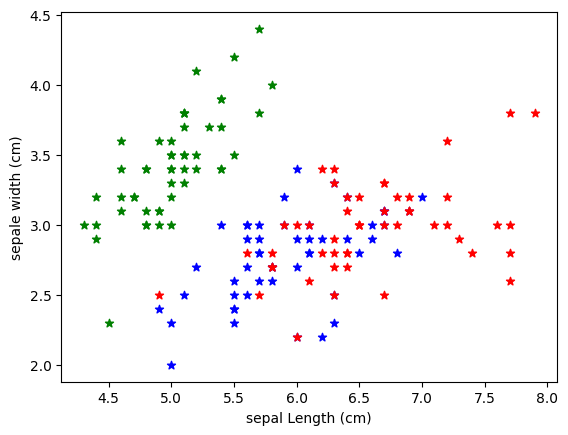

In [14]:
plt.xlabel('sepal Length (cm)')
plt.ylabel('sepale width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='*',color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='*',color='red')

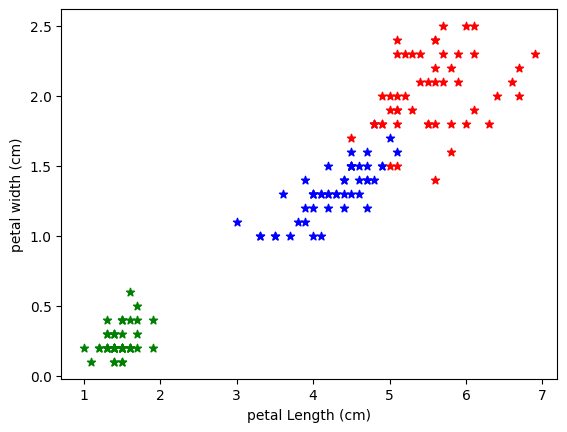

In [15]:
plt.xlabel('petal Length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='*',color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='*',color='red')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df.drop(['target','Flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y=df.target
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
len(x_train)

120

In [21]:
len(x_test)

30

In [36]:
from sklearn.svm import SVC
model=SVC(kernel='linear' )
model.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
y_pred=model.predict(x_test)

In [38]:
model.score(x_test,y_test)*100

93.33333333333333

In [39]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


##Another Example for SVM


In [40]:
from sklearn.datasets import load_digits
digits=load_digits()
x=digits.data
y=digits.target

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9805555555555555
